In [1]:
#importing importants libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv(r"C:\Users\Hasan Shaik\Desktop\hasan_batch2_MTH2\hasan_batch2_MTH2\propertyevaluation1.csv")

In [3]:
df1.head()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory
0,PR11101,1,NY,BATHGATE,1473 CROTONA PLACE,10456,2927,127,02 TWO FAMILY DWELLINGS
1,PR11102,1,NY,BATHGATE,453 EAST 181,10457,3037,110,03 THREE FAMILY DWELLINGS
2,PR11103,1,NY,BATHGATE,511 EAST 171 STREET,10457,2912,155,02 TWO FAMILY DWELLINGS
3,PR11104,1,NY,BATHGATE,547 CLAREMONT PARKWAY,10457,2929,134,02 TWO FAMILY DWELLINGS
4,PR11105,1,NY,BATHGATE,2063 WASHINGTON AVENUE,10457,3036,140,02 TWO FAMILY DWELLINGS


In [4]:
df2 = pd.read_csv(r"C:\Users\Hasan Shaik\Desktop\hasan_batch2_MTH2\hasan_batch2_MTH2\propertyevaluation2.csv")

In [5]:
df2.tail()

,PropertyID,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
16806,PR27907,1,0,1,12518,2252,2003,2,R4,19-12-2014,6250000
16807,PR27908,1,0,1,12518,2177,2003,2,R4,16-11-2014,7150000
16808,PR27909,1,0,1,12644,594,1981,2,R4,17-09-2014,550000
16809,PR27910,16,1,17,4996,29529,2007,2,D7,22-03-2013,5000000
16810,PR27910,16,1,17,4996,29529,2007,2,D7,22-03-2013,5000000


In [6]:
#merging df1 and df2
df3 = pd.merge(df1,df2,on='PropertyID', how='left')

In [7]:
df3.head()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
0,PR11101,1,NY,BATHGATE,1473 CROTONA PLACE,10456,2927,127,02 TWO FAMILY DWELLINGS,2,0,2,1900,2394,-1990,1,B1,30-05-2014,540000
1,PR11102,1,NY,BATHGATE,453 EAST 181,10457,3037,110,03 THREE FAMILY DWELLINGS,3,0,3,1687,3037,2002,1,C0,13-09-2014,750000
2,PR11103,1,NY,BATHGATE,511 EAST 171 STREET,10457,2912,155,02 TWO FAMILY DWELLINGS,2,0,2,2000,2400,1989,1,B1,28-09-2014,470000
3,PR11104,1,NY,BATHGATE,547 CLAREMONT PARKWAY,10457,2929,134,02 TWO FAMILY DWELLINGS,2,0,2,2356,2394,1991,1,B1,05-06-2014,570000
4,PR11105,1,NY,BATHGATE,2063 WASHINGTON AVENUE,10457,3036,140,02 TWO FAMILY DWELLINGS,2,0,2,3346,2308,1993,1,B1,07-02-2015,-640000


In [8]:
df3.shape

(16813, 19)

# 1. removing duplicates value

In [9]:
#checking is there any duplicate value is there or not
df3.duplicated().sum()

3

In [10]:
#removing duplicates value
df3 = df3.drop_duplicates()

In [11]:
df3.shape

(16810, 19)

# 2. checking and removing null values

In [12]:
df3.isnull().sum()

PropertyID                     0
Borough                       24
State                          2
Surroundings                   0
Address                        0
ZipCode                        0
Block                          0
Lot                            0
BldgClassCategory              0
NoOfResidentialUnits          21
NoOfCommercialUnits           12
TotalNoOfUnits                 0
LandAreaInSqFt                 0
GrossAreaInSqFt                0
YearOfConstruction             0
TaxClass_AtEvaluationTime     73
BldgClass_AtEvaluationTime     0
DateOfEvaluation               0
PropertyEvaluationvalue        0
dtype: int64

In [13]:
df3.isnull().sum().sum()

132

In [14]:
# this code will give us all columns who contain null values
[features for features in df3.columns if df3[features].isnull().sum()>0]

['Borough',
 'State',
 'NoOfResidentialUnits',
 'NoOfCommercialUnits',
 'TaxClass_AtEvaluationTime']

In [15]:
df3['Borough'].unique()

array(['1', '3', nan, '19999', '2', '5', '189768', '4', '#', '$', '^',
       '%', '!'], dtype=object)

this values are not usefull so it is better to remove this column 

In [16]:
df3.pop('Borough')

0        1
1        1
2        1
3        1
4        1
        ..
16805    4
16806    4
16807    4
16808    4
16809    4
Name: Borough, Length: 16810, dtype: object

In [17]:
df3['State'].unique()

array(['NY', nan], dtype=object)

same this column is also not make any sense , so we delete this column also

In [18]:
df3.pop('State')

0        NY
1        NY
2        NY
3        NY
4        NY
         ..
16805    NY
16806    NY
16807    NY
16808    NY
16809    NY
Name: State, Length: 16810, dtype: object

In [19]:
df3['NoOfResidentialUnits'].unique()

array(['2', '3', '4', nan, '1', '0', '70', '38', '74', '*', '@', '!',
       '16', '8', '18', '20', '6', '14', '5', '7', '71', '37', '194',
       '42', '68', '28', '46', '51', '10', '77', '9', '72', '73', '%',
       'Z', '11', '12', '111', '21', '`', '$', '55', '24', '90', '84',
       '52', '26', '15', '152', '27', '200', '291', '17', '156', '64',
       '107', '22', '85', '36', '43', '122', '48', '334', '50', '61',
       '30', '180', '81', '60', '39', '100', '340', '437', '66', '176',
       '256', '128', '155'], dtype=object)

In [20]:
#this column sound usedull so we will treat null values of this column
 
    
# this code convert all values to null values exclude numeric values     
df3['NoOfResidentialUnits'] = pd.to_numeric(df3['NoOfResidentialUnits'], errors='coerce')

In [21]:
  mean = df3['NoOfResidentialUnits'].mean()

In [22]:
df3 = df3.fillna({'NoOfResidentialUnits':mean})

In [23]:
df3['NoOfResidentialUnits'].isnull().sum()

0

In [24]:
df3['NoOfCommercialUnits'].unique()

array(['0', '1', nan, '4', '8', '7', '3', '#', '^', '6', '2', '&', '5',
       '11', '10', '*', 'A24', '252', '29', '%', '26', '12', '15', '14',
       '47'], dtype=object)

In [25]:
df3['NoOfCommercialUnits'] = pd.to_numeric(df3['NoOfCommercialUnits'], errors='coerce')


In [26]:
mean1 = df3['NoOfCommercialUnits'].mean()

In [27]:
df3 = df3.fillna({'NoOfCommercialUnits': mean1})

In [28]:
df3['NoOfCommercialUnits'].isnull().sum()

0

In [29]:
df3['TaxClass_AtEvaluationTime'].unique()

array(['1', '2', '4', nan, '@', '!', '#', '%', '&'], dtype=object)

there are lots un usefull value better delete column

In [30]:
df3.pop('TaxClass_AtEvaluationTime')

0        1
1        1
2        1
3        1
4        1
        ..
16805    2
16806    2
16807    2
16808    2
16809    2
Name: TaxClass_AtEvaluationTime, Length: 16810, dtype: object

In [31]:
df3.isnull().sum().sum()

0

# 3. some negative values are contain in some columns firts changing that negative value to positive values

In [32]:
df3['YearOfConstruction'] =df3['YearOfConstruction'].abs()

In [33]:
df3['PropertyEvaluationvalue'] =df3['PropertyEvaluationvalue'].abs()

In [34]:
df3

,PropertyID,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
0,PR11101,BATHGATE,1473 CROTONA PLACE,10456,2927,127,02 TWO FAMILY DWELLINGS,2.0,0.0,2,1900,2394,1990,B1,30-05-2014,540000
1,PR11102,BATHGATE,453 EAST 181,10457,3037,110,03 THREE FAMILY DWELLINGS,3.0,0.0,3,1687,3037,2002,C0,13-09-2014,750000
2,PR11103,BATHGATE,511 EAST 171 STREET,10457,2912,155,02 TWO FAMILY DWELLINGS,2.0,0.0,2,2000,2400,1989,B1,28-09-2014,470000
3,PR11104,BATHGATE,547 CLAREMONT PARKWAY,10457,2929,134,02 TWO FAMILY DWELLINGS,2.0,0.0,2,2356,2394,1991,B1,05-06-2014,570000
4,PR11105,BATHGATE,2063 WASHINGTON AVENUE,10457,3036,140,02 TWO FAMILY DWELLINGS,2.0,0.0,2,3346,2308,1993,B1,07-02-2015,640000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16805,PR27906,CIVIC CENTER,30 PARK PLACE,10007,123,1213,13 CONDOS - ELEVATOR APARTMENTS,1.0,0.0,1,29715,2803,2004,R4,30-11-2014,8454562
16806,PR27907,CIVIC CENTER,56 LEONARD STREET,10013,176,1054,13 CONDOS - ELEVATOR APARTMENTS,1.0,0.0,1,12518,2252,2003,R4,19-12-2014,6250000
16807,PR27908,CIVIC CENTER,56 LEONARD STREET,10013,176,1102,13 CONDOS - ELEVATOR APARTMENTS,1.0,0.0,1,12518,2177,2003,R4,16-11-2014,7150000
16808,PR27909,TRIBECA,250 SOUTH END AVENUE,10280,16,2249,13 CONDOS - ELEVATOR APARTMENTS,1.0,0.0,1,12644,594,1981,R4,17-09-2014,550000


# 4.  Dealing with outliers

In [35]:
# Select only the numeric columns
numeric_columns = df3.select_dtypes(include=['int64', 'float64'])

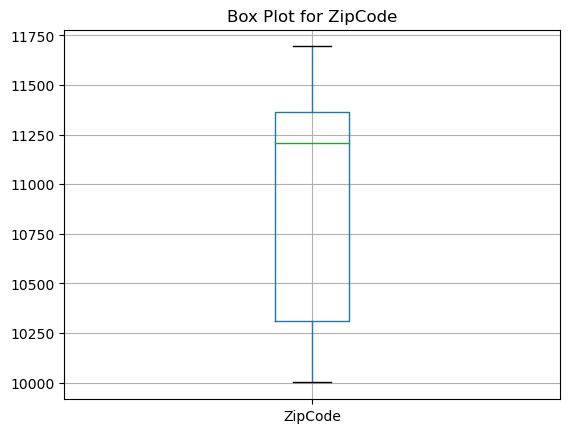

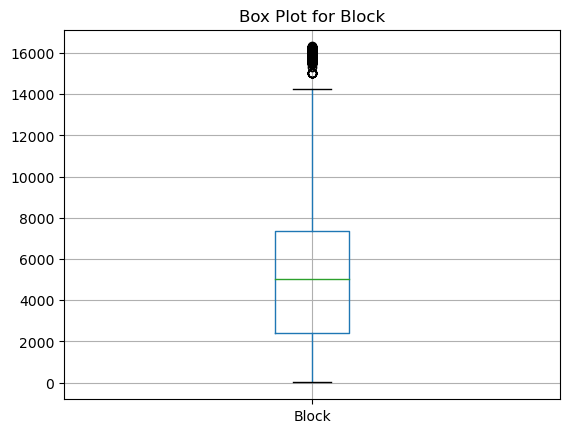

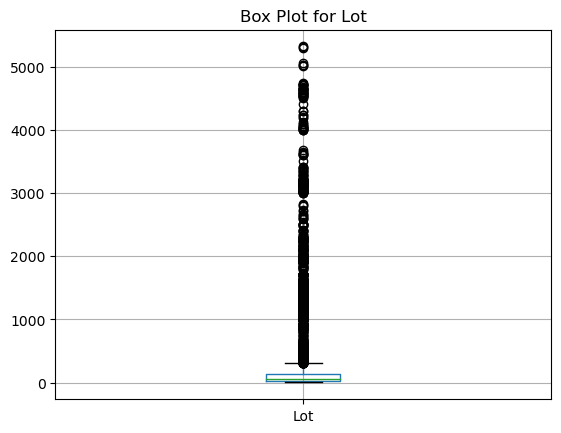

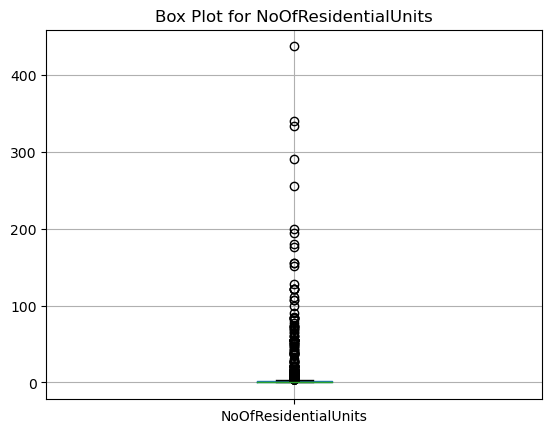

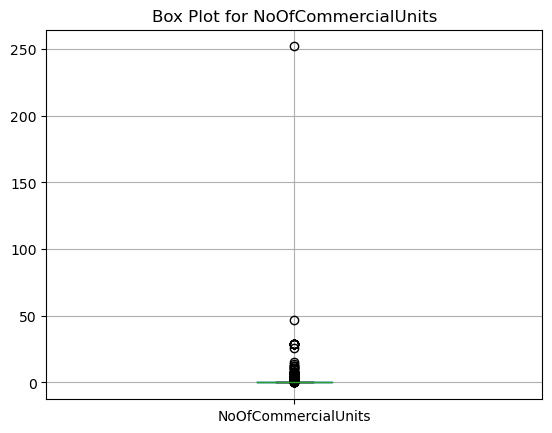

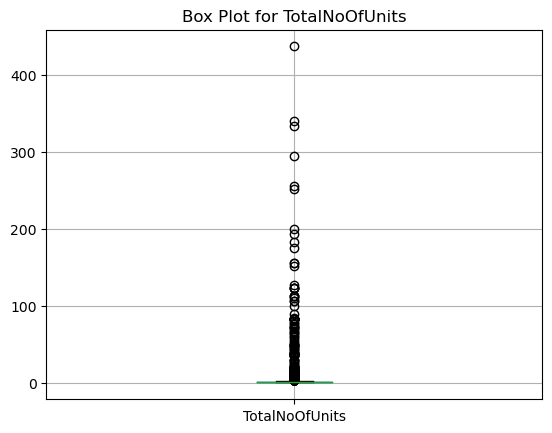

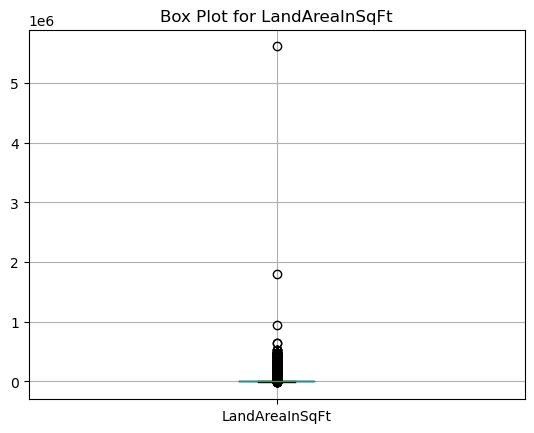

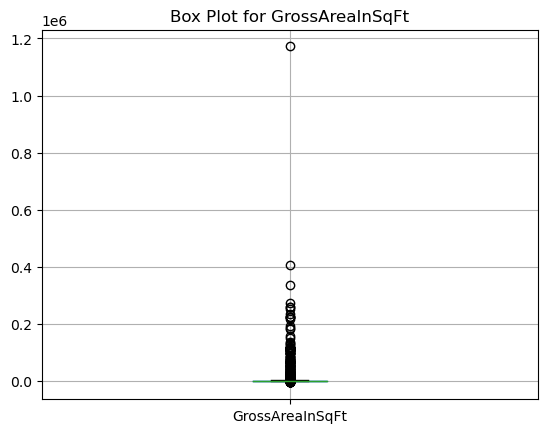

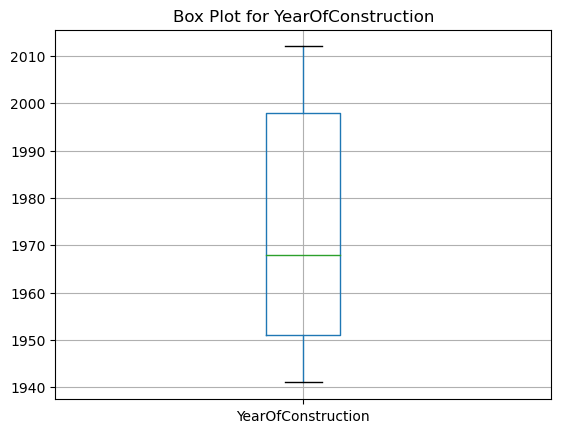

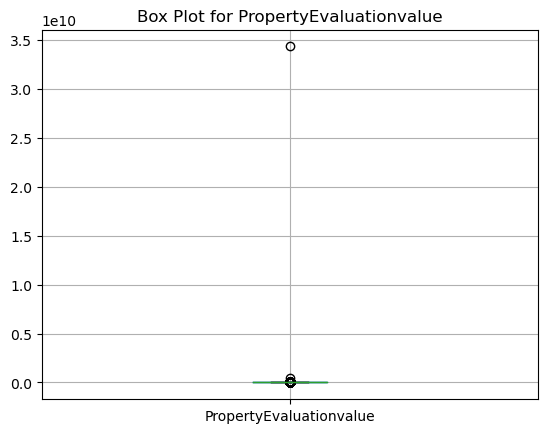

In [36]:

# Loop through each numeric column and create individual box plots
for column in numeric_columns:
    plt.figure()  # Create a new figure for each box plot
    df3[[column]].boxplot()
    plt.title(f"Box Plot for {column}")  # Set a title for each box plot
    plt.show()

In [37]:
# now some columns contains outliers 

#removing all outliers at a time by using funstion

# Function to remove outliers using the IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Select only the numeric columns
numeric_columns = df3.select_dtypes(include=['int64', 'float64'])

# Remove outliers from each numeric column and update the DataFrame
for column in numeric_columns:
    df3 = remove_outliers_iqr(df3, column)

In [38]:
df3.shape

(11160, 16)

In [39]:
#verifyying outliers are removed or not

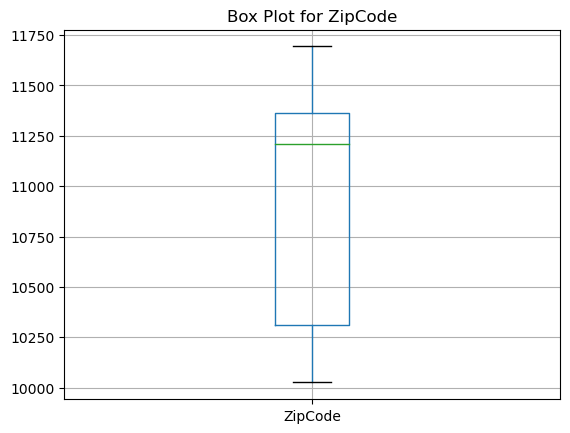

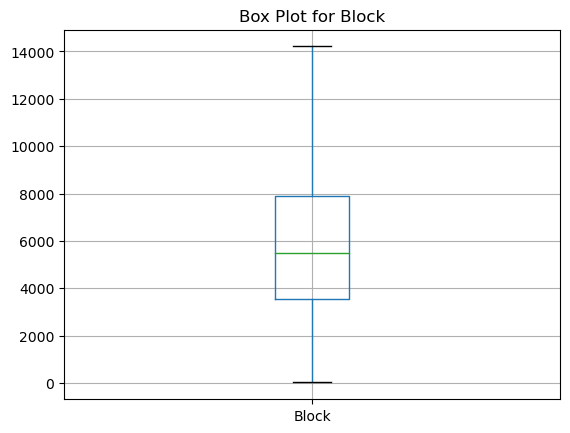

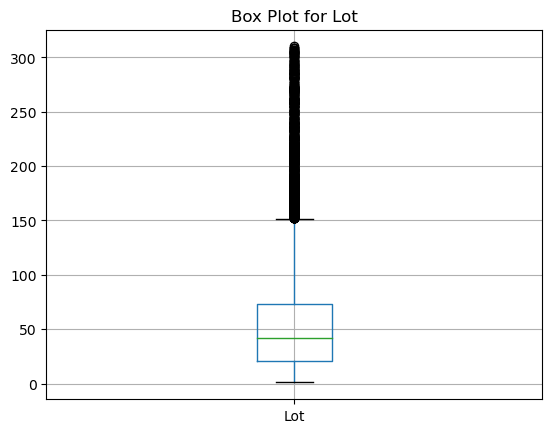

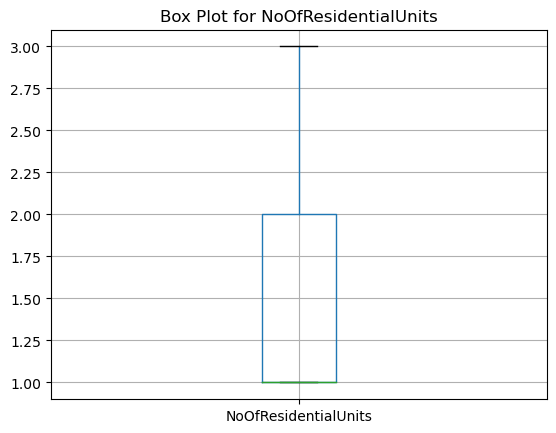

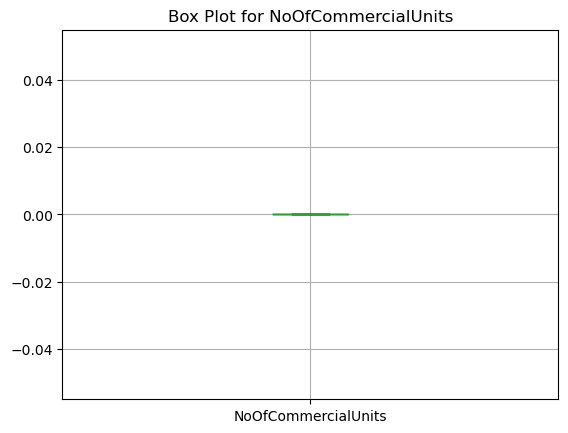

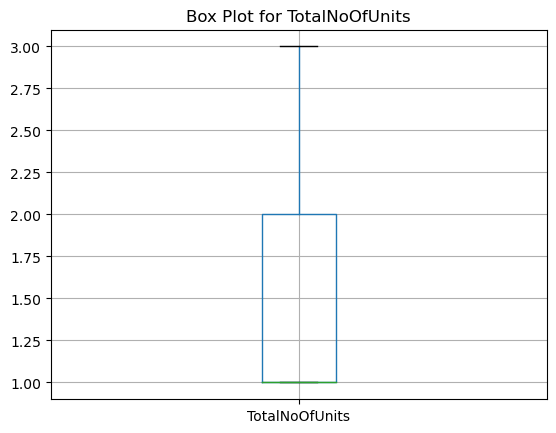

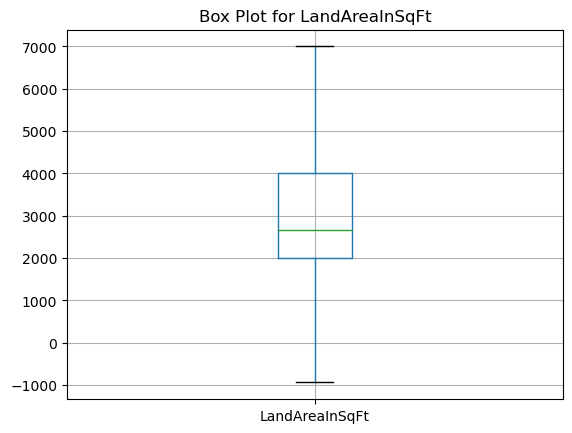

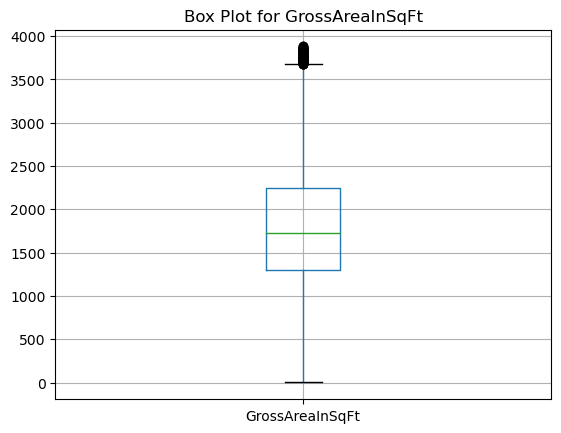

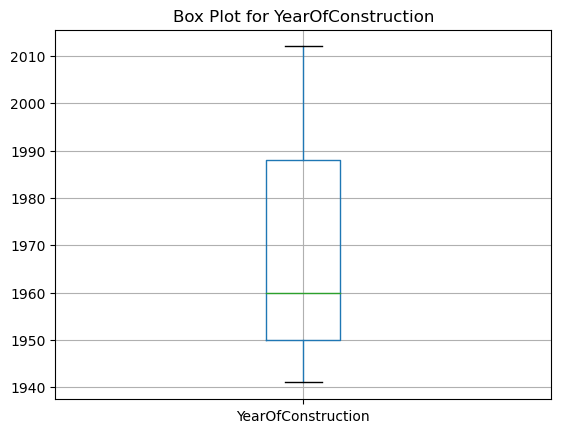

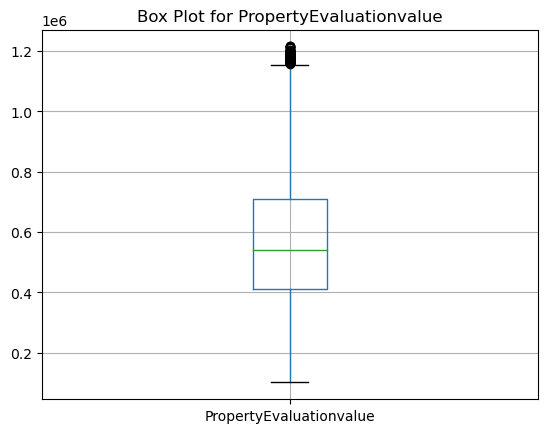

In [40]:
# Select only the numeric columns
numeric_columns = df3.select_dtypes(include=['int64', 'float64'])

# Loop through each numeric column and create individual box plots
for column in numeric_columns:
    plt.figure()  # Create a new figure for each box plot
    df3[[column]].boxplot()
    plt.title(f"Box Plot for {column}")  # Set a title for each box plot
    plt.show()

In [41]:
# 5. feature engineering 

In [42]:
# Check column uniqueness
unique_counts = df3.nunique()
unnecessary_columns = unique_counts[unique_counts == 1].index.tolist()


# If you find two highly correlated columns, you might want to drop one of them
correlation_threshold = 0.9
correlation_matrix = df3.corr()
correlation_pairs = (correlation_matrix.abs() > correlation_threshold) & (correlation_matrix < 1)
duplicates = [col for col in correlation_pairs.columns if any(correlation_pairs[col])]
unnecessary_columns += duplicates


In [43]:

# Drop unnecessary columns from the DataFrame
df_cleaned = df3.drop(columns=unnecessary_columns)

In [45]:
df_cleaned.shape

(11160, 13)

In [46]:
unnecessary_columns = ['PropertyID', 'Surroundings', 'Address', 'Block', 'Lot', 'BldgClass_AtEvaluationTime', 'DateOfEvaluation']

# Remove unnecessary columns from the DataFrame
df_cleaned.drop(columns=unnecessary_columns , inplace=True)



In [47]:
df_cleaned.shape

(11160, 6)

In [48]:
df_cleaned.isnull().sum().sum()

0

In [49]:
df_cleaned.dtypes

ZipCode                     int64
BldgClassCategory          object
LandAreaInSqFt              int64
GrossAreaInSqFt             int64
YearOfConstruction          int64
PropertyEvaluationvalue     int64
dtype: object

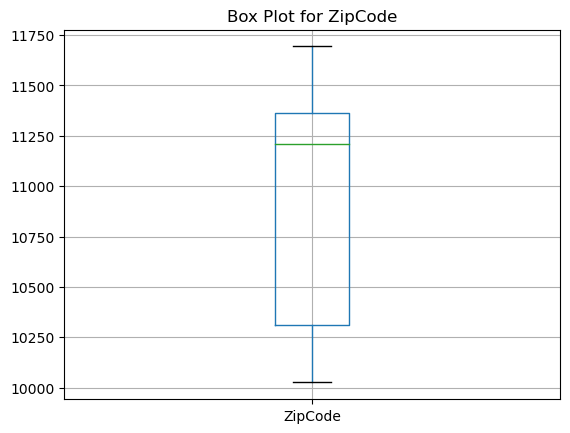

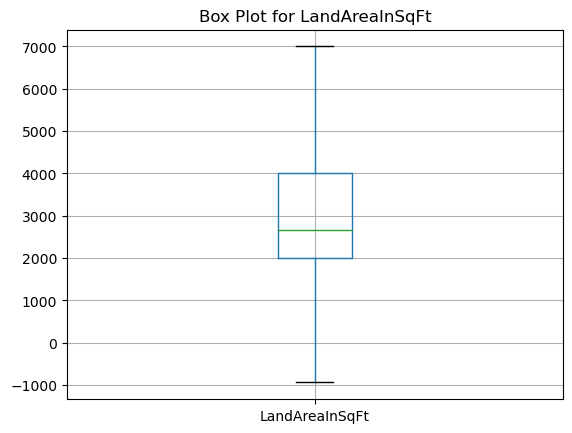

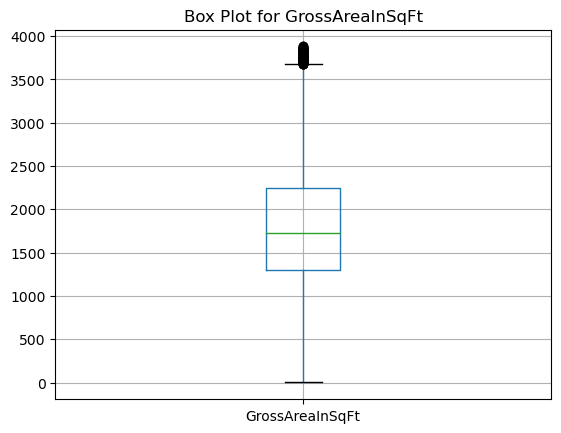

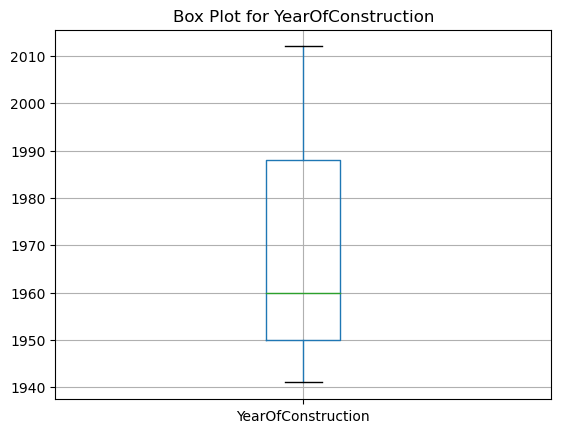

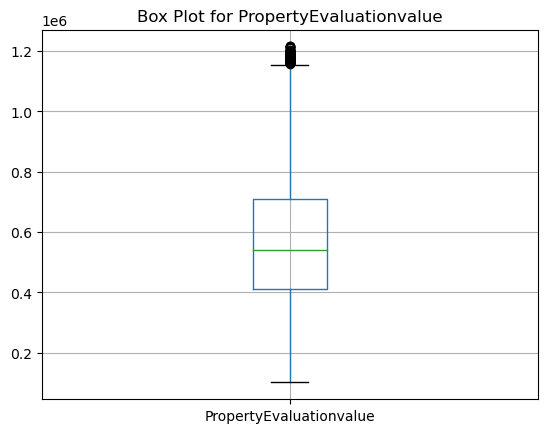

In [50]:
# Select only the numeric columns
numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64'])

# Loop through each numeric column and create individual box plots
for column in numeric_columns:
    plt.figure()  # Create a new figure for each box plot
    df_cleaned[[column]].boxplot()
    plt.title(f"Box Plot for {column}")  # Set a title for each box plot
    plt.show()

# EDA completed here , data is cleaned and optimize

In [51]:
df_cleaned

,ZipCode,BldgClassCategory,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,PropertyEvaluationvalue
0,10456,02 TWO FAMILY DWELLINGS,1900,2394,1990,540000
1,10457,03 THREE FAMILY DWELLINGS,1687,3037,2002,750000
2,10457,02 TWO FAMILY DWELLINGS,2000,2400,1989,470000
3,10457,02 TWO FAMILY DWELLINGS,2356,2394,1991,570000
4,10457,02 TWO FAMILY DWELLINGS,3346,2308,1993,640000
...,...,...,...,...,...,...
16400,11362,01 ONE FAMILY DWELLINGS,5000,936,1951,908000
16401,11362,01 ONE FAMILY DWELLINGS,4854,2087,2009,999000
16402,11362,01 ONE FAMILY HOMES,6000,1386,1955,725000
16404,11362,01 ONE FAMILY DWELLINGS,5000,1960,1941,1200000


# machine learning model

In [54]:
#converting categorical column to numerical 
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to be converted to numerical
categorical_column = 'BldgClassCategory'

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Perform label encoding for the categorical column
df_cleaned[categorical_column] = label_encoder.fit_transform(df_cleaned[categorical_column])

# The categorical column is now converted to a numerical column using label encoding
print(df_cleaned)



       ZipCode  BldgClassCategory  LandAreaInSqFt  GrossAreaInSqFt  \
0        10456                  3            1900             2394   
1        10457                  5            1687             3037   
2        10457                  3            2000             2400   
3        10457                  3            2356             2394   
4        10457                  3            3346             2308   
...        ...                ...             ...              ...   
16400    11362                  1            5000              936   
16401    11362                  1            4854             2087   
16402    11362                  0            6000             1386   
16404    11362                  1            5000             1960   
16496    10026                  4            2119             2280   

       YearOfConstruction  PropertyEvaluationvalue  
0                    1990                   540000  
1                    2002                   750000  


In [55]:
df_cleaned

,ZipCode,BldgClassCategory,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,PropertyEvaluationvalue
0,10456,3,1900,2394,1990,540000
1,10457,5,1687,3037,2002,750000
2,10457,3,2000,2400,1989,470000
3,10457,3,2356,2394,1991,570000
4,10457,3,3346,2308,1993,640000
...,...,...,...,...,...,...
16400,11362,1,5000,936,1951,908000
16401,11362,1,4854,2087,2009,999000
16402,11362,0,6000,1386,1955,725000
16404,11362,1,5000,1960,1941,1200000


In [56]:
X = df_cleaned[['ZipCode', 'BldgClassCategory', 'LandAreaInSqFt', 'GrossAreaInSqFt', 'YearOfConstruction']]
y = df_cleaned['PropertyEvaluationvalue']

In [58]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Create and train the Gradient Boosting Regressor model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [60]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [61]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) on test set:", mse)
print("R-squared (R2) on test set:", r2)

Mean Squared Error (MSE) on test set: 20364847569.77814
R-squared (R2) on test set: 0.5902923679303895
